# Hierarchical Clustering

Hierarchical clustering is a clustering algorithm that builds a hierarchy of clusters. It does not require the number of clusters to be predefined. Instead, it creates a tree-like structure, known as a dendrogram, where the leaves represent individual data points, and the branches represent clusters at different levels of similarity.

## Types of Hierarchical Clustering

There are two main types of hierarchical clustering:

- **Agglomerative Hierarchical Clustering:** Starts with each data point as a separate cluster and recursively merges the closest pairs of clusters.
- **Divisive Hierarchical Clustering:** Starts with all data points in a single cluster and recursively splits it into smaller clusters.

##  Linkage Criteria

Linkage criteria determine the distance between clusters in hierarchical clustering based on the distances between their data points. Different linkage criteria can result in different cluster structures. Let's explore the commonly used linkage criteria:

1. **Single Linkage:**

    - Single linkage computes the minimum distance between any two points in the clusters.
    - It tends to form long, elongated clusters.
    - Single linkage is sensitive to noise and outliers.

2. **Complete Linkage:**

    - Complete linkage computes the maximum distance between any two points in the clusters.
    - It tends to form compact, spherical clusters.
    - Complete linkage is less sensitive to noise and outliers compared to single linkage.

3. **Average Linkage:**

    - Average linkage computes the average distance between all pairs of points in the clusters.
    - It is a compromise between single and complete linkage.
    - Average linkage can handle moderate levels of noise and outliers.

4. **Ward Linkage:**

    - Ward linkage minimizes the increase in total within-cluster variance after merging clusters.
    - It aims to minimize the variance within each cluster.
    - Ward linkage often results in well-defined, evenly sized clusters.

Choosing the appropriate linkage criterion depends on the characteristics of the data and the desired cluster structure. It is common to try different linkage criteria and evaluate their performance using evaluation metrics or domain knowledge.

In [1]:
import numpy as np
from scipy.cluster.hierarchy import linkage

# Define the data matrix
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

# Compute linkage matrix using ward linkage
linkage_matrix = linkage(X, method='ward')
print(linkage_matrix)

[[ 0.          1.          5.19615242  2.        ]
 [ 2.          3.          5.19615242  2.        ]
 [ 4.          5.         14.69693846  4.        ]]


## Cophenetic Correlation Coefficient

The cophenetic correlation coefficient is a measure of the correlation between the pairwise distances of the original data points and the distances obtained from the hierarchical clustering dendrogram. It quantifies how well the dendrogram preserves the original pairwise distances.

Here's how you can calculate the cophenetic correlation coefficient:

- Perform hierarchical clustering on your data using a specific linkage method, such as "ward" or "complete".
- Obtain the dendrogram, which is a tree-like structure representing the hierarchical clustering.
- Calculate the pairwise distances between all data points.
- Calculate the cophenetic distances, which are the distances obtained from the dendrogram.
- For each pair of data points, find the height at which their dendrogram branches merge.
- The cophenetic distance is the vertical distance between the branches where the merge occurs.
- Calculate the correlation coefficient between the pairwise distances and the cophenetic distances.

The cophenetic correlation coefficient ranges from -1 to 1. A value close to 1 indicates that the dendrogram accurately preserves the pairwise distances, while a value close to -1 suggests a poor preservation of distances.

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data, _ = make_blobs(n_samples=200, centers=4, random_state=42)

# Perform hierarchical clustering
Z = linkage(data, method='ward')

# Calculate cophenetic correlation coefficient
c, _ = cophenet(Z, pdist(data))

print("Cophenetic correlation coefficient:", c)

Cophenetic correlation coefficient: 0.9540072151353552


## Agglomerative Clustering

Agglomerative clustering is a hierarchical clustering algorithm that starts with each data point as a separate cluster and iteratively merges the most similar clusters until a termination criterion is met. It forms a hierarchy of clusters that can be represented as a dendrogram.

The agglomerative clustering algorithm follows these steps:

**Step 1: Initialization**
- Assign each data point to its own cluster.

**Step 2: Pairwise Distance Computation**
- Compute the pairwise distances between clusters based on a distance metric.

**Step 3: Merge Clusters**
- Merge the closest pair of clusters based on a linkage criterion.
- Update the distance matrix with the new distances.

**Step 4: Termination Criterion**
- Repeat steps 2 and 3 until a termination criterion is met.
- The termination criterion can be a fixed number of clusters or a specific distance threshold.

### Determining the Number of Clusters

Deciding the appropriate number of clusters is crucial. Here are some techniques to determine the number of clusters in agglomerative clustering:

**Dendrogram**
- Plot the dendrogram, which shows the hierarchical structure of the clusters.
- Choose the number of clusters based on the heights of the horizontal lines where merging occurs.

**Cutting the Dendrogram**
- Decide on the desired number of clusters and cut the dendrogram at the appropriate height.

### Evaluation Metrics
After clustering, it's important to evaluate the quality of the results. Two common evaluation metrics for agglomerative clustering are:

**Silhouette Coefficient**
- Measures the average cohesion and separation of the clusters.
- Ranges from -1 to 1, where higher values indicate better clustering.

**Calinski-Harabasz Index**
- Measures the ratio of between-cluster variance to within-cluster variance.
- Higher values indicate better clustering.

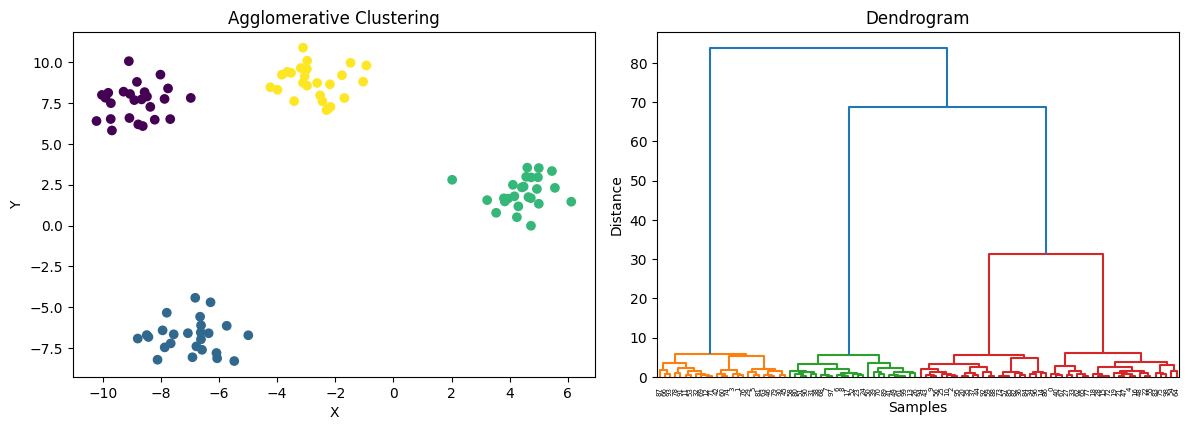

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Generating Synthetic Data
X, _ = make_blobs(n_samples=100, centers=4, random_state=42)

# Determine the Optimal Number of Clusters
max_clusters = 10
silhouette_scores = []
calinski_harabasz_scores = []
for n_clusters in range(2, max_clusters + 1):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))

# Implement Agglomerative Clustering with Optimal Number of Clusters
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
agg_clustering.fit(X)

# Visualize Clusters
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('X')
plt.ylabel('Y')

# Plot Dendrogram
plt.subplot(2, 2, 2)
dendrogram = dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

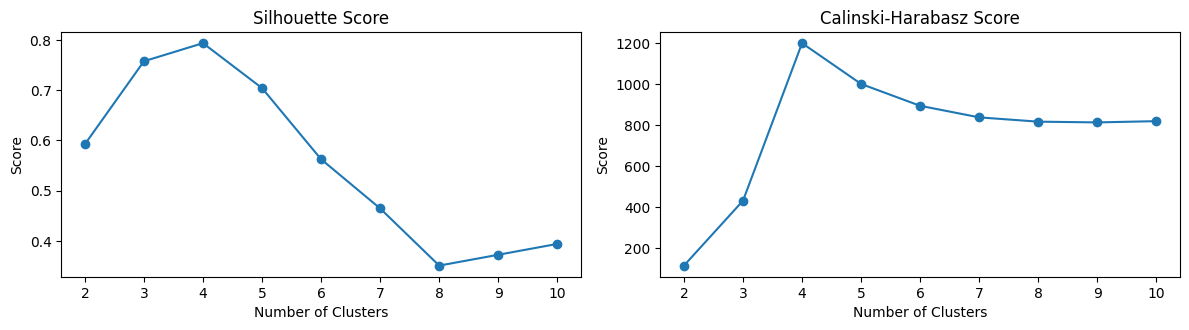

In [4]:
# Plot Evaluation Curves
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.subplot(2, 2, 4)
plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

## Divisive Clustering

Divisive hierarchical clustering is a technique that starts with the entire dataset as a single cluster and recursively splits it into smaller clusters until a termination condition is met. It creates a hierarchy of clusters, forming a tree-like structure known as a dendrogram.

**Step 1: Initialization**
- Start with the entire dataset as a single cluster.

**Step 2: Splitting**
- Choose a clustering criterion to determine how to split the clusters.
- Calculate the dissimilarity between data points or clusters.
- Split the cluster that maximizes the dissimilarity.

**Step 3: Recursion**
- Recursively apply the splitting step until a termination condition is met.

**Step 4: Termination**
- Terminate the algorithm when reaching a specific number of clusters, a maximum level of the hierarchy, or a dissimilarity threshold.

### Determining the Optimal Number of Clusters
Determining the optimal number of clusters in divisive clustering can be challenging. However, you can use a dendrogram to visualize the hierarchy and decide on the appropriate number of clusters based on the structure of the tree.

### Evaluation Metrics
After clustering, it's important to evaluate the quality of the results. One common evaluation metric for divisive clustering is the cophenetic correlation coefficient. It measures the correlation between the pairwise distances of the original data and the distances obtained from the dendrogram.

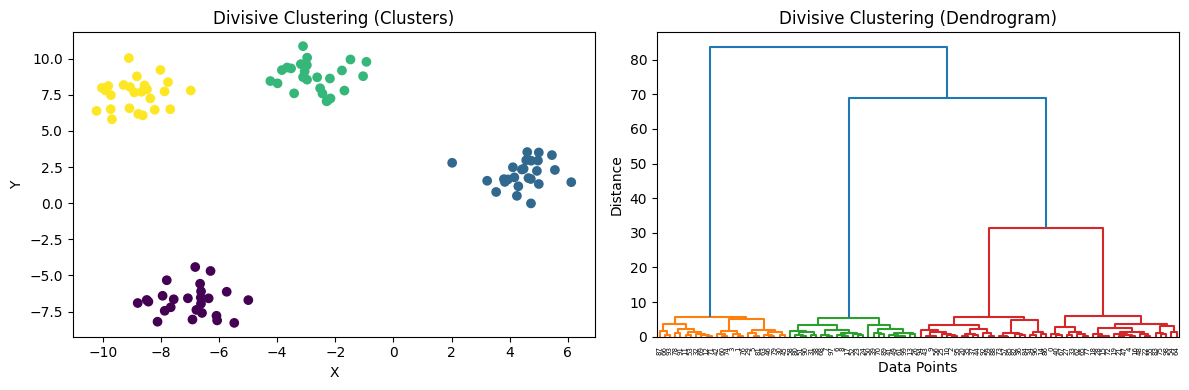

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# Generating Synthetic Data
X, _ = make_blobs(n_samples=100, centers=4, random_state=42)

# Implementing Divisive Clustering
Z = linkage(X, method='ward')

# Visualizing Clusters and Dendrogram
plt.figure(figsize=(12, 4))

# Plotting Clusters
plt.subplot(1, 2, 1)
k = 4  # Number of clusters
clusters = fcluster(Z, k, criterion='maxclust')
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('Divisive Clustering (Clusters)')
plt.xlabel('X')
plt.ylabel('Y')

# Plotting Dendrogram
plt.subplot(1, 2, 2)
dendrogram(Z)
plt.title('Divisive Clustering (Dendrogram)')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

## References

- [Scipy documentation on hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)
- [Definitive Guide to Hierarchical Clustering with Python and Scikit-Learn](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)